In [4]:
import pandas as pd

In [9]:
deliveries_df = pd.read_csv("deliveries.csv")

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


deliveries_df.info(), deliveries_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

(None,
    match_id  inning           batting_team                 bowling_team  over  \
 0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
 1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
 2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
 3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
 4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
 
    ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
 0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
 1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
 2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
 3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
 4     5  BB McCullum  P Kumar   SC Ganguly             0           0   
 
    total_runs extras_type  is_wicket player_dismissed dism

C:\Users\hp\AppData\Local\Temp\ipykernel_17504\1618570934.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values, y=top_scorers.index, ax=axs[0, 0], palette="Blues_d")
C:\Users\hp\AppData\Local\Temp\ipykernel_17504\1618570934.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, ax=axs[0, 1], palette="Reds_d")
C:\Users\hp\AppData\Local\Temp\ipykernel_17504\1618570934.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sixes.values, y=sixes.index, ax=axs[1, 0], palett

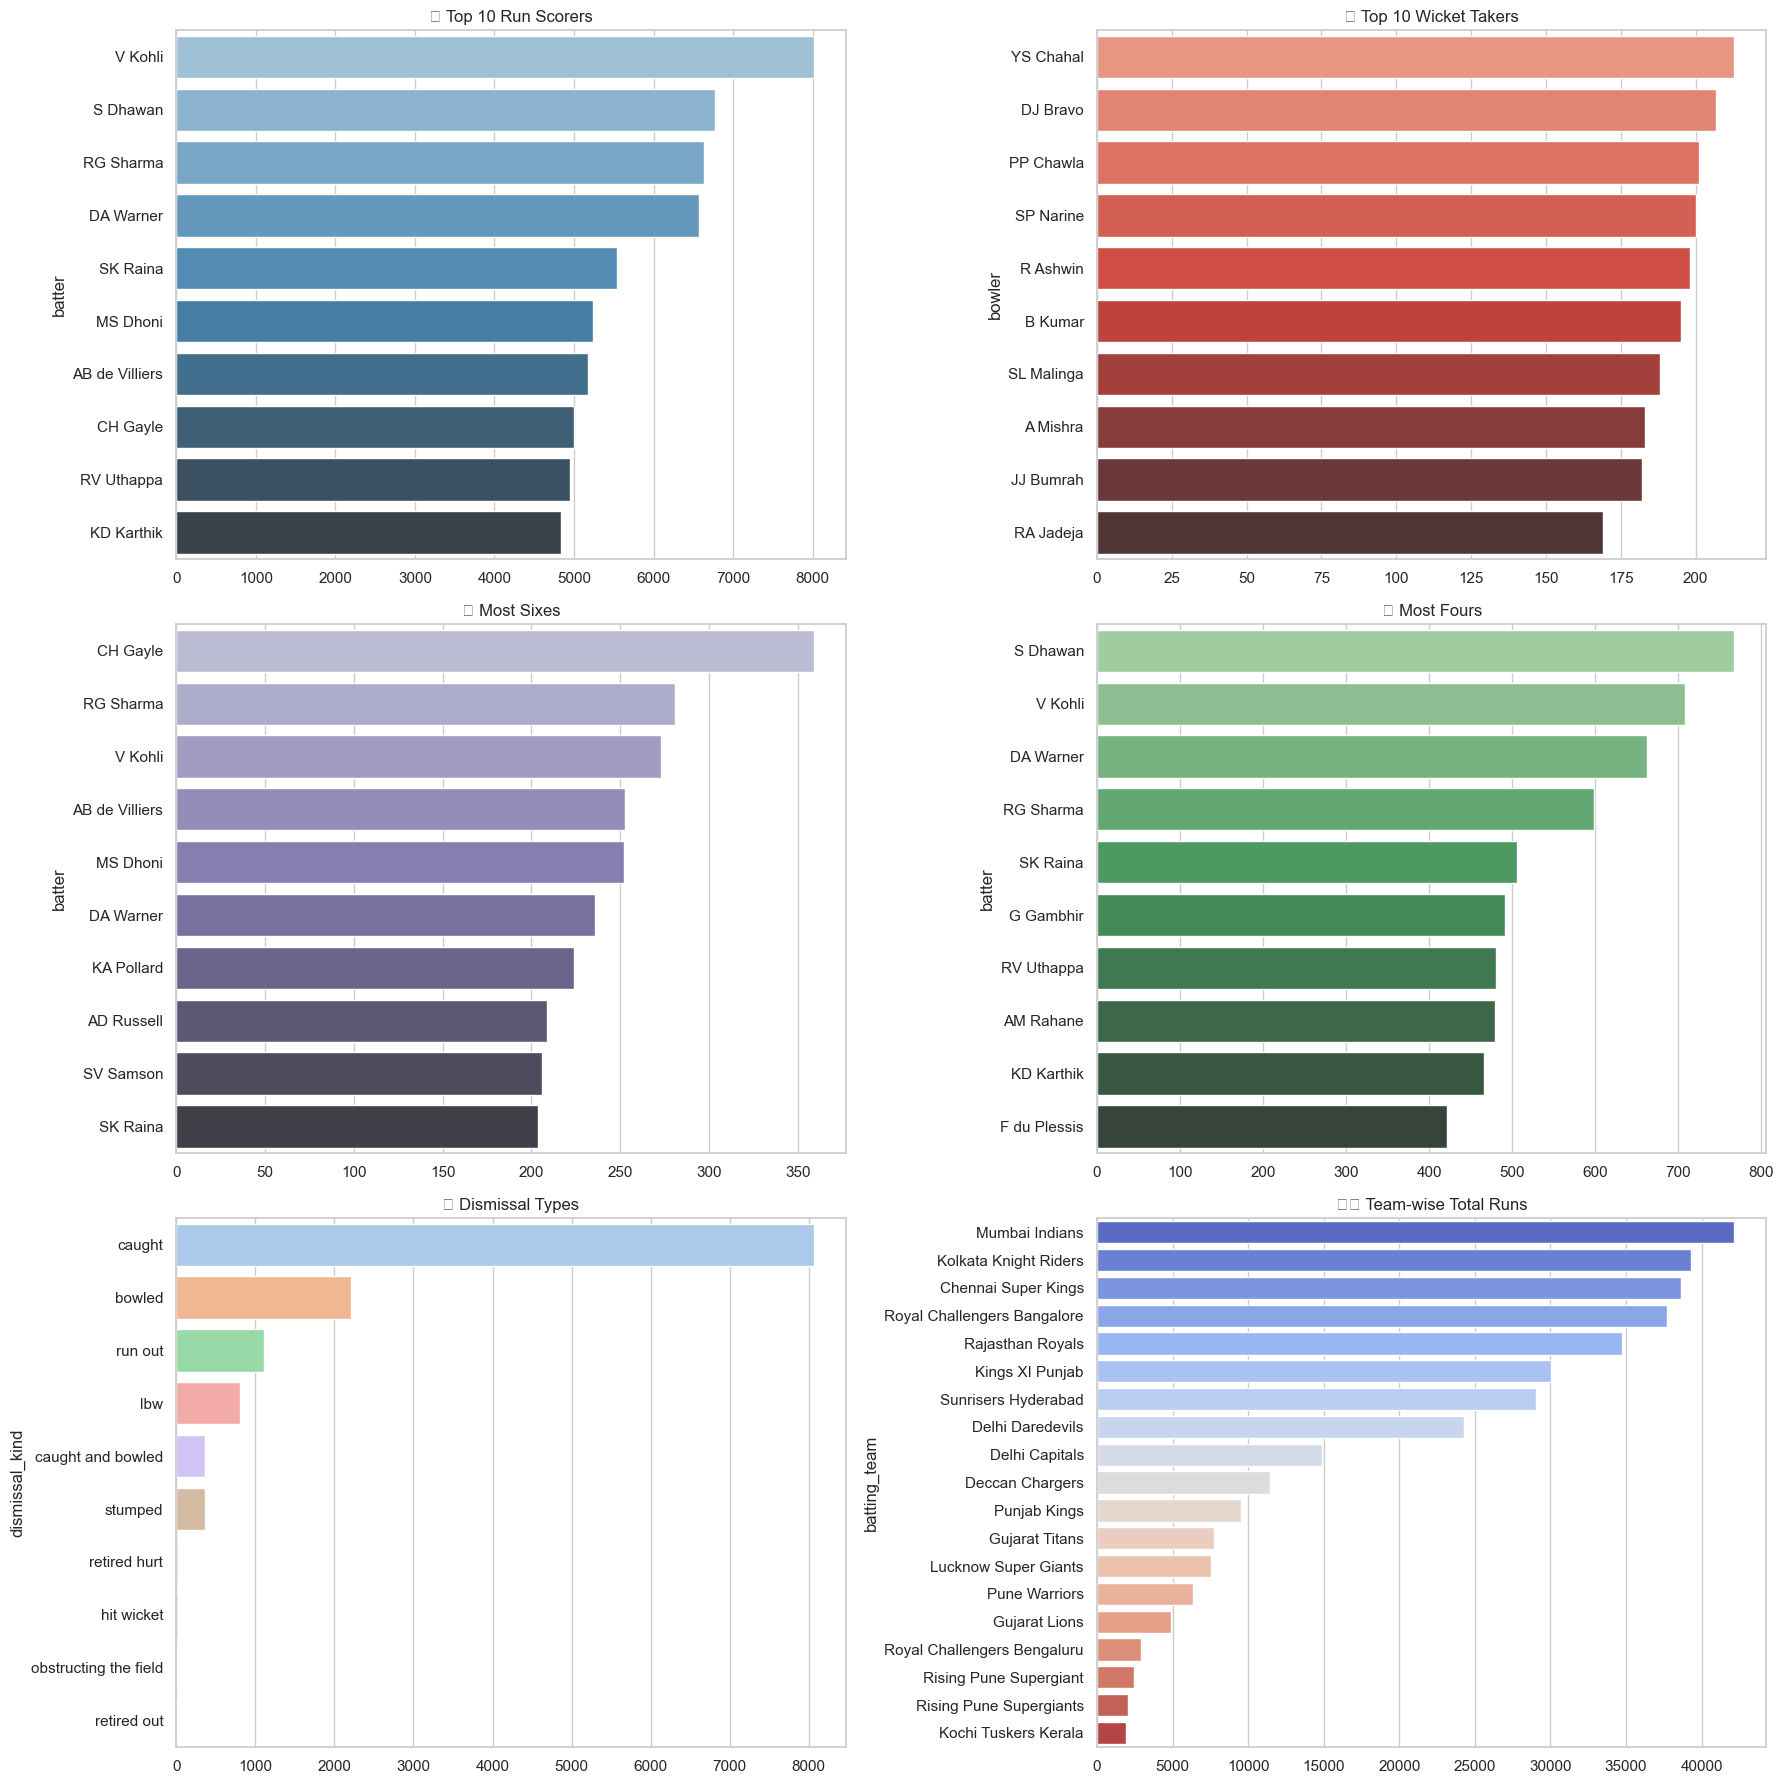

In [11]:
# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Top 10 Run Scorers
top_scorers = deliveries_df.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

# 2. Top 10 Wicket Takers
wicket_deliveries = deliveries_df[deliveries_df["is_wicket"] == 1]
top_wicket_takers = wicket_deliveries.groupby("bowler")["is_wicket"].count().sort_values(ascending=False).head(10)

# 3. Most Sixes and Fours
sixes = deliveries_df[deliveries_df["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count().sort_values(ascending=False).head(10)
fours = deliveries_df[deliveries_df["batsman_runs"] == 4].groupby("batter")["batsman_runs"].count().sort_values(ascending=False).head(10)

# 4. Dismissal Types
dismissal_kinds = deliveries_df["dismissal_kind"].value_counts()

# 5. Team-wise Total Runs
team_runs = deliveries_df.groupby("batting_team")["total_runs"].sum().sort_values(ascending=False)

# Plot all charts in subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Top Run Scorers
sns.barplot(x=top_scorers.values, y=top_scorers.index, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title("🏏 Top 10 Run Scorers")

# Top Wicket Takers
sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, ax=axs[0, 1], palette="Reds_d")
axs[0, 1].set_title("🎯 Top 10 Wicket Takers")

# Most Sixes
sns.barplot(x=sixes.values, y=sixes.index, ax=axs[1, 0], palette="Purples_d")
axs[1, 0].set_title("💥 Most Sixes")

# Most Fours
sns.barplot(x=fours.values, y=fours.index, ax=axs[1, 1], palette="Greens_d")
axs[1, 1].set_title("🔥 Most Fours")

# Dismissal Types
sns.barplot(x=dismissal_kinds.values, y=dismissal_kinds.index, ax=axs[2, 0], palette="pastel")
axs[2, 0].set_title("❌ Dismissal Types")

# Team Runs
sns.barplot(x=team_runs.values, y=team_runs.index, ax=axs[2, 1], palette="coolwarm")
axs[2, 1].set_title("🏟️ Team-wise Total Runs")

plt.tight_layout()
plt.show()